# SubTask 1:FETCH & STORE Option Chain Data 

In [1]:
import requests 
import pandas as pd 
import time
import json 
from datetime import datetime 
import matplotlib.pyplot as plt


nifty_url="https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"
HDFC_url ="https://www.nseindia.com/api/option-chain-equities?symbol=HDFCBANK"
header={"User-Agent":"Mozilla/5.0 (Windows NT 10.0;Win64;x64)AppleWebkit/537.36(KHTML,like Gecko)Chrome/91.0.4472.124 Safari/537.36",
        "Accept-Encoding":"br,gzip,deflate",
        "Accept-Language":"en-US,en;q=0.7",
        "Connection":"keep-alive",
       }


session=requests.Session()
session.get("https://www.nseindia.com/",headers=header)

hdfc_response=session.get(HDFC_url,headers=header)
hdfc_data=hdfc_response.json()

nifty_response=session.get(nifty_url,headers=header)
nifty_data=nifty_response.json()

print("OPTION CHAIN For HDFC bank:")
for record in hdfc_data['records']['data']:
    print(record)

print("OPTION CHAIN For Nifty:")
for record in nifty_data['records']['data']:
    print(record)

time.sleep(3)

OPTION CHAIN For HDFC bank:
{'strikePrice': 1380, 'expiryDate': '28-Nov-2024', 'PE': {'strikePrice': 1380, 'expiryDate': '28-Nov-2024', 'underlying': 'HDFCBANK', 'identifier': 'OPTSTKHDFCBANK28-11-2024PE1380.00', 'openInterest': 16, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 1, 'impliedVolatility': 48.99, 'lastPrice': 0.45, 'change': -0.04999999999999999, 'pChange': -9.999999999999998, 'totalBuyQuantity': 64350, 'totalSellQuantity': 74800, 'bidQty': 4950, 'bidprice': 0.3, 'askQty': 1650, 'askPrice': 0.6, 'underlyingValue': 1769.2}}
{'strikePrice': 1400, 'expiryDate': '28-Nov-2024', 'CE': {'strikePrice': 1400, 'expiryDate': '28-Nov-2024', 'underlying': 'HDFCBANK', 'identifier': 'OPTSTKHDFCBANK28-11-2024CE1400.00', 'openInterest': 22, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 1, 'impliedVolatility': 66.6, 'lastPrice': 381, 'change': 21, 'pChange': 5.833333333333333, 'totalBuyQuantity': 20350, 'totalSellQuantity': 19800, '

In [2]:
print(json.dumps(hdfc_data,indent=4))
print(json.dumps(nifty_data,indent=4))

{
    "records": {
        "expiryDates": [
            "28-Nov-2024",
            "26-Dec-2024",
            "30-Jan-2025"
        ],
        "data": [
            {
                "strikePrice": 1380,
                "expiryDate": "28-Nov-2024",
                "PE": {
                    "strikePrice": 1380,
                    "expiryDate": "28-Nov-2024",
                    "underlying": "HDFCBANK",
                    "identifier": "OPTSTKHDFCBANK28-11-2024PE1380.00",
                    "openInterest": 16,
                    "changeinOpenInterest": 0,
                    "pchangeinOpenInterest": 0,
                    "totalTradedVolume": 1,
                    "impliedVolatility": 48.99,
                    "lastPrice": 0.45,
                    "change": -0.04999999999999999,
                    "pChange": -9.999999999999998,
                    "totalBuyQuantity": 64350,
                    "totalSellQuantity": 74800,
                    "bidQty": 4950,
                    

# Parsing and Structuring data into a pandas dataframe

In [3]:
for idx, record in enumerate (hdfc_data['records']['data']):
    print(f"Record{idx}:{record}")

hdfc_records=[]
for record in hdfc_data['records']['data']:
    
    call_data=record.get("CE")
    put_data=record.get("PE")
    hdfc_records.append({
        "strikePrice":record.get("strikePrice",None),
        "expiryDate":record.get("expiryDate",None),
#Call data
        "CE_OpenInterest":call_data.get("openInterest",None)if call_data else None,
        "CE_changeInOI":call_data.get("changeinOpenInterest",None)if call_data else None,
        "CE_lastPrice":call_data.get("lastPrice",None)if call_data else None,
        "CE_bidQty":call_data.get("bidQty",None)if call_data else None,
        "CE_askQty":call_data.get("askQty",None)if call_data else None,
#Put data
        "PE_OpenInterest":put_data.get("openInterest",None)if put_data else None,
        "PE_changeInOI":put_data.get("changeinOpenInterest",None)if put_data else None,
        "PE_lastPrice":put_data.get("lastPrice",None)if put_data else None,
        "PE_bidQty":put_data.get("bidQty",None)if put_data else None,
        "PE_askQty":put_data.get("askQty",None)if put_data else None,
    })

Record0:{'strikePrice': 1380, 'expiryDate': '28-Nov-2024', 'PE': {'strikePrice': 1380, 'expiryDate': '28-Nov-2024', 'underlying': 'HDFCBANK', 'identifier': 'OPTSTKHDFCBANK28-11-2024PE1380.00', 'openInterest': 16, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 1, 'impliedVolatility': 48.99, 'lastPrice': 0.45, 'change': -0.04999999999999999, 'pChange': -9.999999999999998, 'totalBuyQuantity': 64350, 'totalSellQuantity': 74800, 'bidQty': 4950, 'bidprice': 0.3, 'askQty': 1650, 'askPrice': 0.6, 'underlyingValue': 1769.2}}
Record1:{'strikePrice': 1400, 'expiryDate': '28-Nov-2024', 'CE': {'strikePrice': 1400, 'expiryDate': '28-Nov-2024', 'underlying': 'HDFCBANK', 'identifier': 'OPTSTKHDFCBANK28-11-2024CE1400.00', 'openInterest': 22, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 1, 'impliedVolatility': 66.6, 'lastPrice': 381, 'change': 21, 'pChange': 5.833333333333333, 'totalBuyQuantity': 20350, 'totalSellQuantity': 19800, 'bidQty': 165

In [4]:
#Converting HDFC data to dataframe 
hdfc_df=pd.DataFrame(hdfc_records)
hdfc_df.head()

strikePrice   expiryDate  CE_OpenInterest  CE_changeInOI  CE_lastPrice  \
0         1380  28-Nov-2024              NaN            NaN           NaN   
1         1400  28-Nov-2024             22.0            0.0         381.0   
2         1440  28-Nov-2024              NaN            NaN           NaN   
3         1480  28-Nov-2024              0.0            0.0           0.0   
4         1480  26-Dec-2024              0.0            0.0           0.0   

   CE_bidQty  CE_askQty  PE_OpenInterest  PE_changeInOI  PE_lastPrice  \
0        NaN        NaN             16.0            0.0          0.45   
1    16500.0     1650.0            167.0            0.0          0.45   
2        NaN        NaN              4.0            0.0          0.00   
3     1650.0     1650.0             25.0            0.0          0.50   
4     1650.0     1650.0              0.0            0.0          0.00   

   PE_bidQty  PE_askQty  
0     4950.0     1650.0  
1      550.0     2200.0  
2      550.0     2200.0  
3    11000.0      550.0  
4     1100.0     1100.0

In [5]:
hdfc_df.tail()

strikePrice   expiryDate  CE_OpenInterest  CE_changeInOI  CE_lastPrice  \
99          1980  28-Nov-2024            133.0          -29.0          0.70   
100         1980  26-Dec-2024              0.0            0.0          0.00   
101         2000  28-Nov-2024           1920.0          -37.0          0.60   
102         2000  26-Dec-2024            379.0           91.0          4.15   
103         2000  30-Jan-2025              0.0            0.0          0.00   

     CE_bidQty  CE_askQty  PE_OpenInterest  PE_changeInOI  PE_lastPrice  \
99     16500.0     4950.0              0.0            0.0           0.0   
100     4400.0        0.0              0.0            0.0           0.0   
101   160600.0     7700.0             71.0           -1.0         222.0   
102     1650.0      550.0              0.0            0.0           0.0   
103     1650.0     1100.0              NaN            NaN           NaN   

     PE_bidQty  PE_askQty  
99      1650.0     1650.0  
100     1650.0    16500.0  
101      550.0      550.0  
102     1650.0     1650.0  
103        NaN        NaN

In [6]:
for idx, record in enumerate (nifty_data['records']['data']):
    print(f"Record{idx}:{record}")

nifty_records=[]
for record in nifty_data['records']['data']:
    
    call_data=record.get("CE")
    put_data=record.get("PE")
    nifty_records.append({
        "strikePrice":record.get("strikePrice",None),
        "expiryDate":record.get("expiryDate",None),
#Call data
        "CE_OpenInterest":call_data.get("openInterest",None)if call_data else None,
        "CE_changeInOI":call_data.get("changeinOpenInterest",None)if call_data else None,
        "CE_lastPrice":call_data.get("lastPrice",None)if call_data else None,
        "CE_bidQty":call_data.get("bidQty",None)if call_data else None,
        "CE_askQty":call_data.get("askQty",None)if call_data else None,
#Put data
        "PE_OpenInterest":put_data.get("openInterest",None)if put_data else None,
        "PE_changeInOI":put_data.get("changeinOpenInterest",None)if put_data else None,
        "PE_lastPrice":put_data.get("lastPrice",None)if put_data else None,
        "PE_bidQty":put_data.get("bidQty",None)if put_data else None,
        "PE_askQty":put_data.get("askQty",None)if put_data else None,
    })

Record0:{'strikePrice': 14000, 'expiryDate': '26-Dec-2024', 'PE': {'strikePrice': 14000, 'expiryDate': '26-Dec-2024', 'underlying': 'NIFTY', 'identifier': 'OPTIDXNIFTY26-12-2024PE14000.00', 'openInterest': 13656, 'changeinOpenInterest': 91, 'pchangeinOpenInterest': 0.6708440840398083, 'totalTradedVolume': 211, 'impliedVolatility': 57.53, 'lastPrice': 3.1, 'change': 0, 'pChange': 0, 'totalBuyQuantity': 66350, 'totalSellQuantity': 26150, 'bidQty': 1900, 'bidprice': 2.8, 'askQty': 300, 'askPrice': 3.15, 'underlyingValue': 24141.45}, 'CE': {'strikePrice': 14000, 'expiryDate': '26-Dec-2024', 'underlying': 'NIFTY', 'identifier': 'OPTIDXNIFTY26-12-2024CE14000.00', 'openInterest': 5, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 0, 'impliedVolatility': 0, 'lastPrice': 0, 'change': 0, 'pChange': 0, 'totalBuyQuantity': 2300, 'totalSellQuantity': 1850, 'bidQty': 475, 'bidprice': 10085.2, 'askQty': 25, 'askPrice': 10450.75, 'underlyingValue': 24141.45}}
Record1:{'stri

In [7]:
#Converting nifty data to dataframe 
nifty_df=pd.DataFrame(nifty_records)
nifty_df.head()

strikePrice   expiryDate  CE_OpenInterest  CE_changeInOI  CE_lastPrice  \
0        14000  26-Dec-2024              5.0            0.0           0.0   
1        14000  26-Jun-2025              NaN            NaN           NaN   
2        14000  31-Dec-2026              NaN            NaN           NaN   
3        15000  26-Dec-2024            619.0            0.0           0.0   
4        15000  24-Dec-2025              NaN            NaN           NaN   

   CE_bidQty  CE_askQty  PE_OpenInterest  PE_changeInOI  PE_lastPrice  \
0      475.0       25.0          13656.0           91.0          3.10   
1        NaN        NaN             65.0            0.0         20.05   
2        NaN        NaN             45.0            0.0          0.00   
3       25.0       25.0           3246.0           31.0          3.35   
4        NaN        NaN             47.0            0.0          0.00   

   PE_bidQty  PE_askQty  
0     1900.0      300.0  
1      750.0      300.0  
2      500.0        0.0  
3       50.0      100.0  
4      300.0        0.0

In [8]:
nifty_df.tail()

strikePrice   expiryDate  CE_OpenInterest  CE_changeInOI  CE_lastPrice  \
758        31000  27-Mar-2025            747.0            0.0          24.0   
759        31000  26-Jun-2025              0.0            0.0           0.0   
760        31000  25-Sep-2025              0.0            0.0           0.0   
761        31000  24-Dec-2025            140.0            2.0         150.0   
762        31000  31-Dec-2026              0.0            0.0           0.0   

     CE_bidQty  CE_askQty  PE_OpenInterest  PE_changeInOI  PE_lastPrice  \
758      125.0      175.0              0.0            0.0           0.0   
759     1500.0        0.0              0.0            0.0           0.0   
760       25.0        0.0              NaN            NaN           NaN   
761       50.0       25.0              NaN            NaN           NaN   
762       25.0        0.0              NaN            NaN           NaN   

     PE_bidQty  PE_askQty  
758       25.0       25.0  
759       25.0        0.0  
760        NaN        NaN  
761        NaN        NaN  
762        NaN        NaN

# Visualization

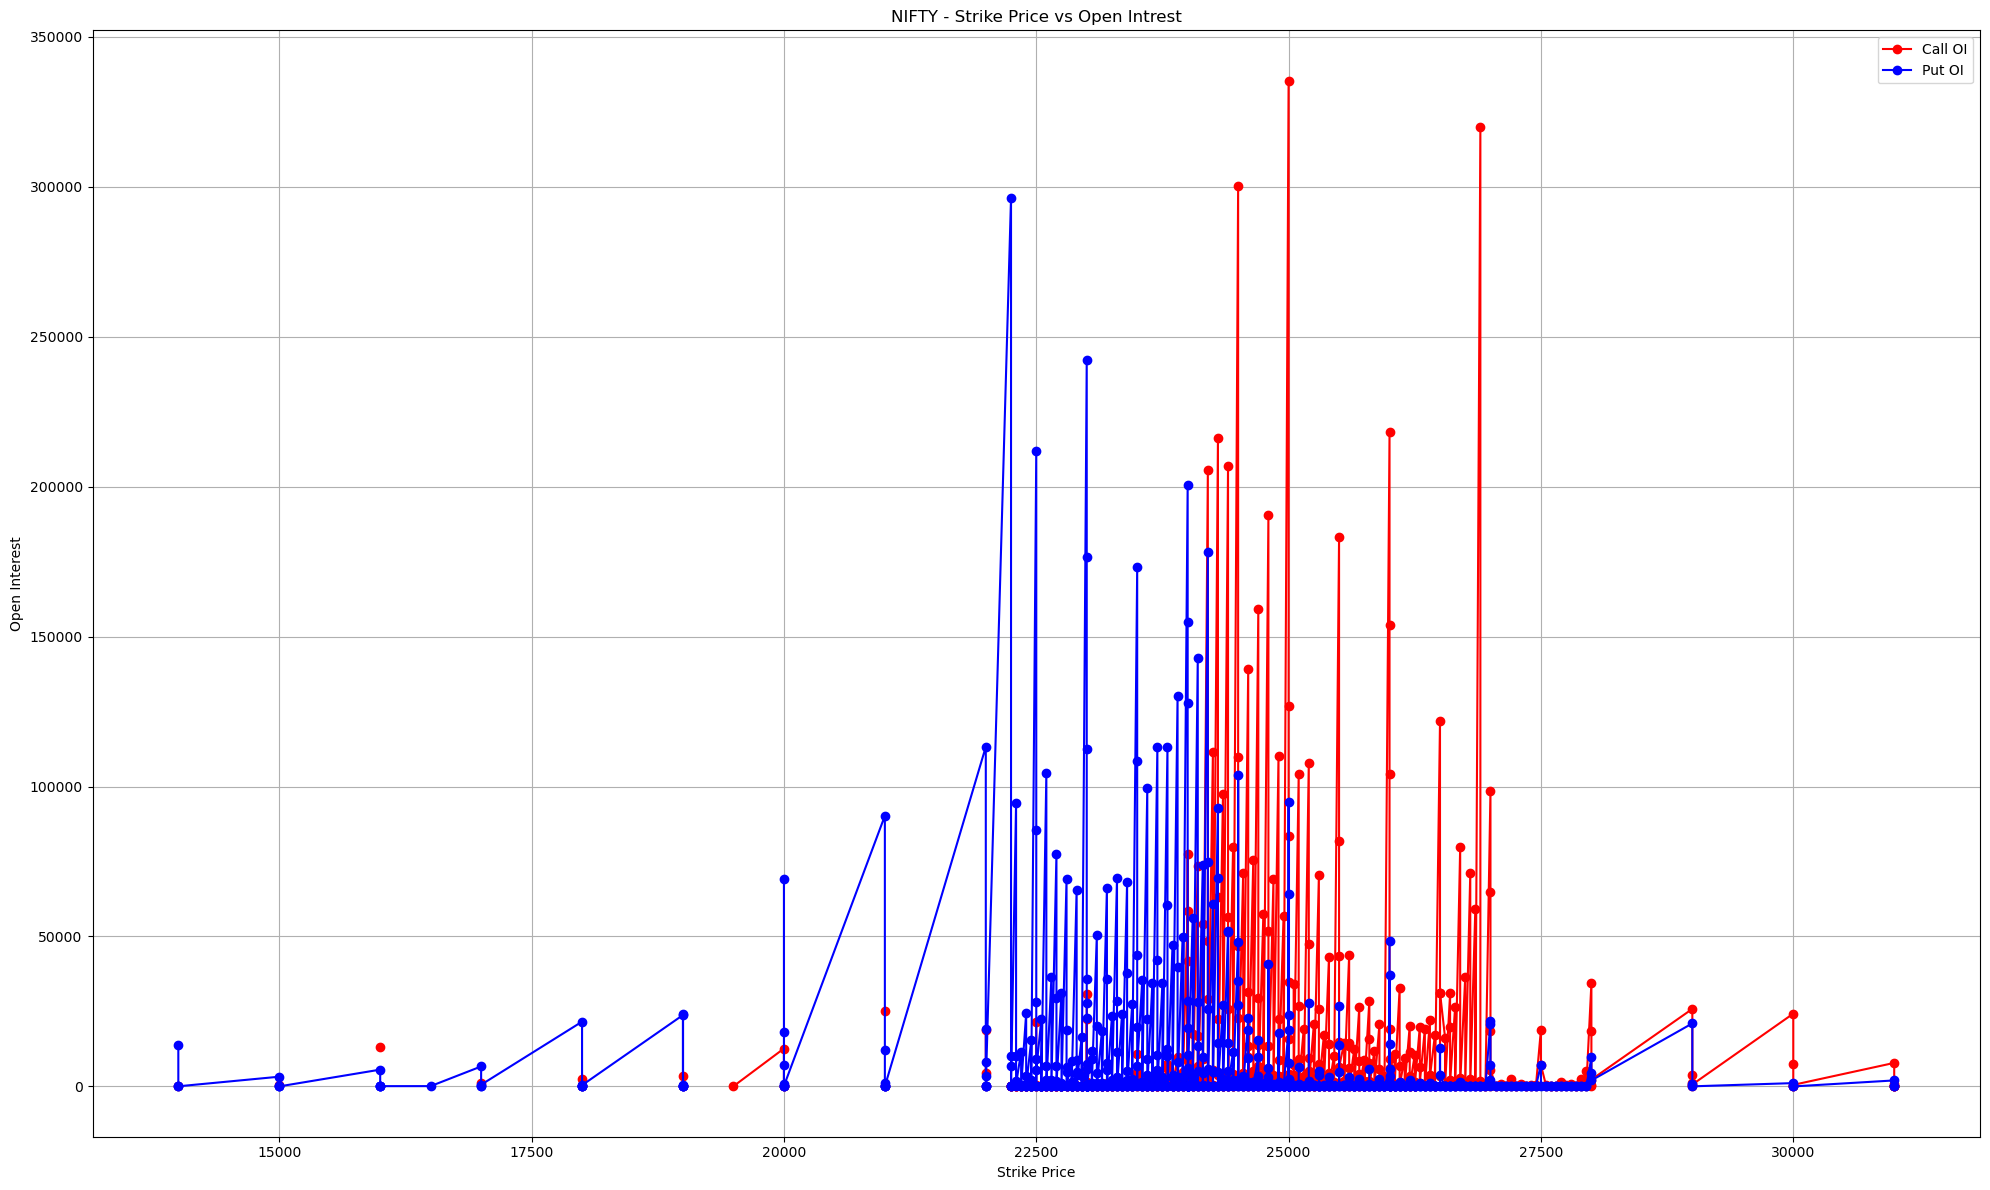

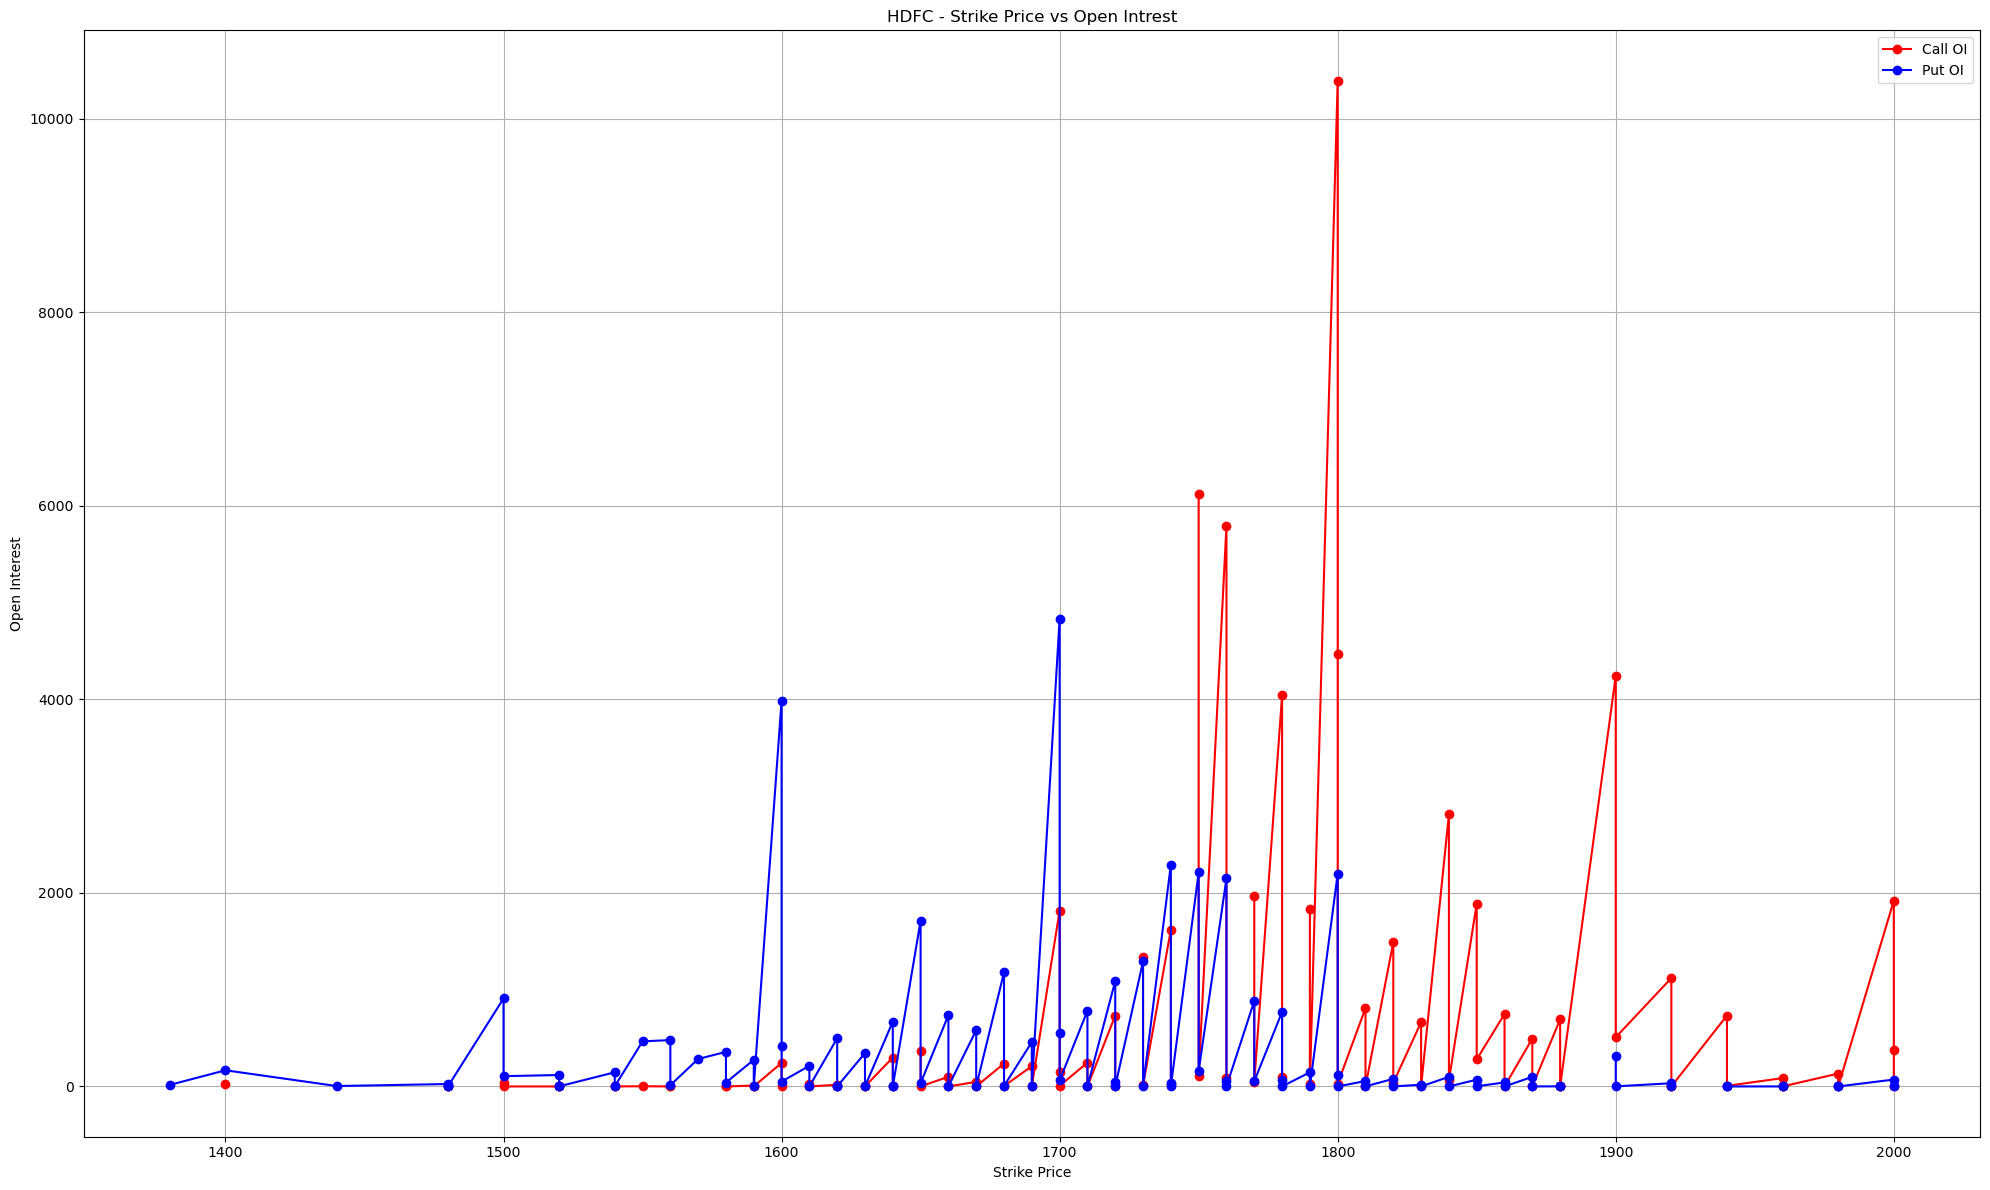

In [9]:
def plot_oi_vs_strikeprice(df,stock):
    plt.figure(figsize=(20,12))
    #plotting call open intrest
    plt.plot(df['strikePrice'],df['CE_OpenInterest'],label='Call OI',color='red',marker='o')
    #plotting put open interest
    plt.plot(df['strikePrice'],df['PE_OpenInterest'],label='Put OI',color='blue',marker='o')
    #setting labels 
    plt.xlabel('Strike Price')
    plt.ylabel('Open Interest')
    plt.title(f'{stock} - Strike Price vs Open Intrest')
    #adding legend
    plt.legend()
    #show the graph
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_oi_vs_strikeprice(nifty_df,'NIFTY')
plot_oi_vs_strikeprice(hdfc_df,'HDFC')
    

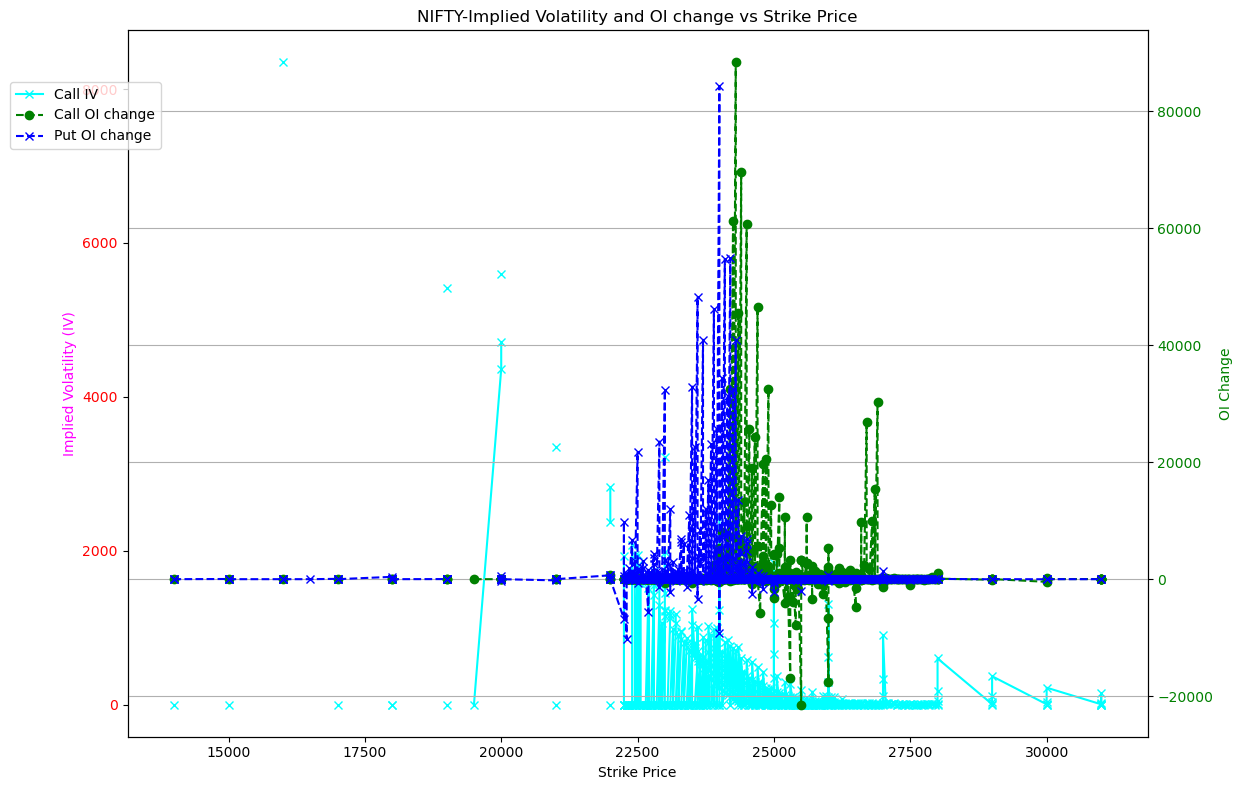

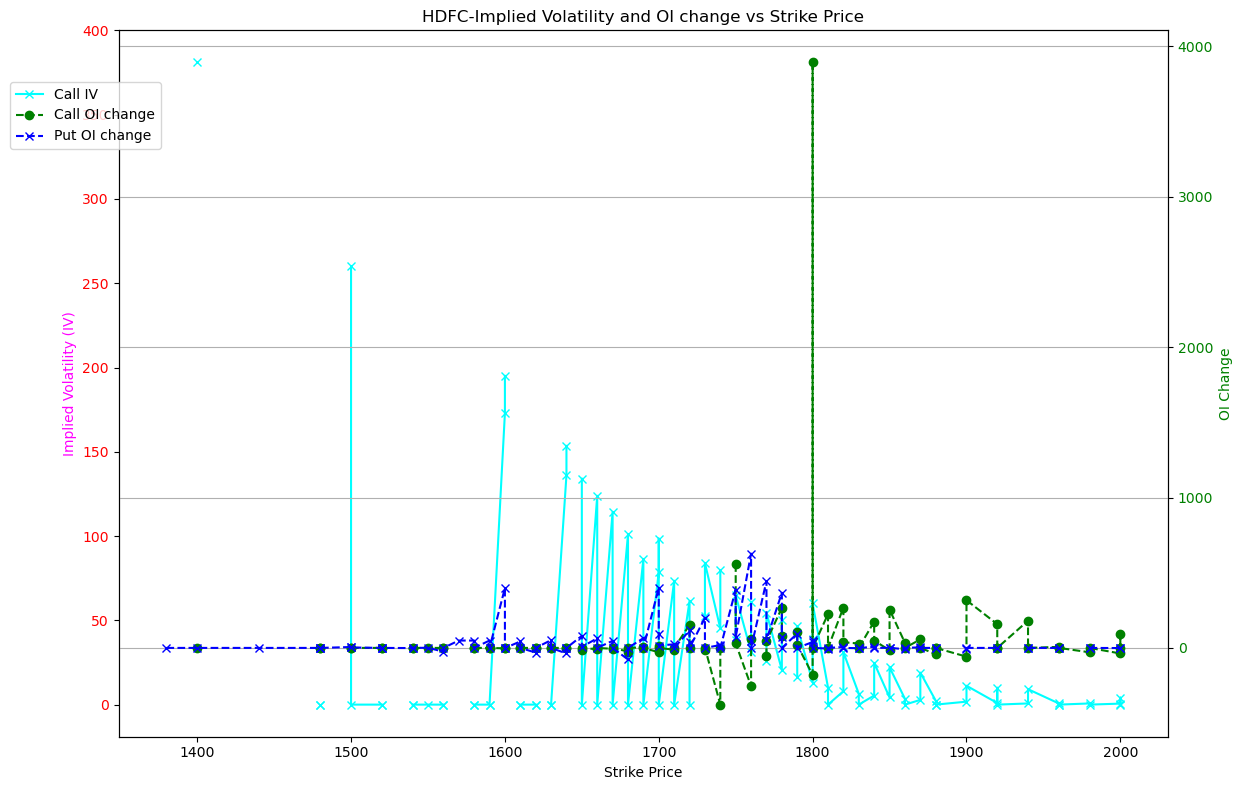

In [10]:
def plot_Implied_volatility_and_change_in_open_interest(df,stock):
    fig,ax1=plt.subplots(figsize=(12,8))
    ax1.set_xlabel("Strike Price")
    ax1.set_ylabel("Implied Volatility (IV)",color="magenta")
    ax1.plot(df['strikePrice'],df['CE_lastPrice'],label="Call IV",color="cyan",marker="x")
    ax1.tick_params(axis="y",labelcolor="red")
    
    ax2=ax1.twinx()
    ax2.set_ylabel("OI Change",color="green")
    ax2.plot(df['strikePrice'],df['CE_changeInOI'],label='Call OI change',color='green',linestyle="--",marker='o')
    ax2.plot(df['strikePrice'],df['PE_changeInOI'],label='Put OI change',color='blue',linestyle="--",marker='x')
    ax2.tick_params(axis="y",labelcolor="green")
    
    plt.title(f'{stock}-Implied Volatility and OI change vs Strike Price')
    fig.tight_layout()
    fig.legend(loc='upper right',bbox_to_anchor=(0.1,0.9))
    plt.grid(True)
    plt.show()
plot_Implied_volatility_and_change_in_open_interest(nifty_df,'NIFTY')
plot_Implied_volatility_and_change_in_open_interest(hdfc_df,'HDFC')   